In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
%matplotlib inline

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('artifacts\\data_ingestion\\Raw_data.csv')

In [9]:
data.head()

,PatientID,Sex,Age,HB_score,timeOfTreatment,Treatment_group,got_Prednisolone,got_Acyclovir,HB_score_3mnths,cured3mnths,HB_score_9mnths,cured9mnths
0,1,Female,77,6,Within 24 hr,Prednisolone–Placebo,Yes,No,2,No,2,No\r
1,2,Female,61,6,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes\r
2,3,Female,46,4,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes\r
3,4,Female,46,3,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes\r
4,5,Female,42,3,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes\r


In [11]:
data.timeOfTreatment.unique()

array(['Within 24 hr', '>24 to ≤48 hr', '>48 to ≤72 hr', 'Unknown'],
      dtype=object)

In [14]:
data.cured9mnths.unique()

array(['No\r', 'Yes\r'], dtype=object)

In [4]:
data.tail()

,Patient ID,Sex,Age,Baseline Score on House–Brackmann scale,Time between onset of symptoms and start of treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months
489,490,Male,40,5,>24 to ≤48 hr,Placebo–Placebo,No,No,2,No,2,No
490,491,Male,37,3,>24 to ≤48 hr,Placebo–Placebo,No,No,1,Yes,1,Yes
491,492,Female,56,3,>24 to ≤48 hr,Placebo–Placebo,No,No,1,Yes,1,Yes
492,493,Male,33,4,Within 24 hr,Placebo–Placebo,No,No,1,Yes,1,Yes
493,494,Female,34,5,Within 24 hr,Placebo–Placebo,No,No,4,No,4,No


In [5]:
data['Full Recovery in 3 Months'].value_counts()

Full Recovery in 3 Months
Yes    358
No     136
Name: count, dtype: int64

In [6]:
data['Full Recovery in 9 Months'].value_counts()

Full Recovery in 9 Months
Yes    441
No      53
Name: count, dtype: int64

In [7]:
data.shape

(494, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Patient ID                                             494 non-null    int64 
 1   Sex                                                    494 non-null    object
 2   Age                                                    494 non-null    int64 
 3   Baseline Score on House–Brackmann scale                494 non-null    int64 
 4   Time between onset of symptoms and start of treatment  494 non-null    object
 5   Treatment Group                                        494 non-null    object
 6   Received Prednisolone                                  494 non-null    object
 7   Received Acyclovir                                     494 non-null    object
 8   3-Month Score on House–Brackmann scale                 494 n

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient ID,494.0,247.500000,142.749781,1.0,124.25,247.5,370.75,494.0
Age,494.0,44.868421,14.550357,16.0,34.00,44.0,55.00,90.0
Baseline Score on House–Brackmann scale,494.0,3.680162,1.131752,2.0,3.00,4.0,4.00,6.0
3-Month Score on House–Brackmann scale,494.0,1.340081,0.609037,1.0,1.00,1.0,2.00,4.0
9-Month Score on House–Brackmann scale,494.0,1.143725,0.461050,1.0,1.00,1.0,1.00,4.0


In [10]:
data.columns

Index(['Patient ID', 'Sex', 'Age', 'Baseline Score on House–Brackmann scale',
       'Time between onset of symptoms and start of treatment',
       'Treatment Group', 'Received Prednisolone', 'Received Acyclovir',
       '3-Month Score on House–Brackmann scale', 'Full Recovery in 3 Months',
       '9-Month Score on House–Brackmann scale', 'Full Recovery in 9 Months'],
      dtype='object')

In [11]:
data.dtypes

Patient ID                                                int64
Sex                                                      object
Age                                                       int64
Baseline Score on House–Brackmann scale                   int64
Time between onset of symptoms and start of treatment    object
Treatment Group                                          object
Received Prednisolone                                    object
Received Acyclovir                                       object
3-Month Score on House–Brackmann scale                    int64
Full Recovery in 3 Months                                object
9-Month Score on House–Brackmann scale                    int64
Full Recovery in 9 Months                                object
dtype: object

In [12]:
data.isnull().sum()

Patient ID                                               0
Sex                                                      0
Age                                                      0
Baseline Score on House–Brackmann scale                  0
Time between onset of symptoms and start of treatment    0
Treatment Group                                          0
Received Prednisolone                                    0
Received Acyclovir                                       0
3-Month Score on House–Brackmann scale                   0
Full Recovery in 3 Months                                0
9-Month Score on House–Brackmann scale                   0
Full Recovery in 9 Months                                0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
def find_outliers_iqr_and_plot(data):
    for column in data.columns:
        if np.issubdtype(data[column].dtype, np.number):
            #Q1 = data[column].quantile(0.25)
            #Q3 = data[column].quantile(0.75)
            #IQR = Q3 - Q1
            #lower_bound = Q1 - 1.5 * IQR
            #upper_bound = Q3 + 1.5 * IQR
            #outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            
            plt.figure(figsize=(15, 5))
            sns.boxplot(x=data[column])
            plt.title(f'Box plot of {column}')
            plt.xlabel(column)
            plt.ylabel('Value')
            plt.show()

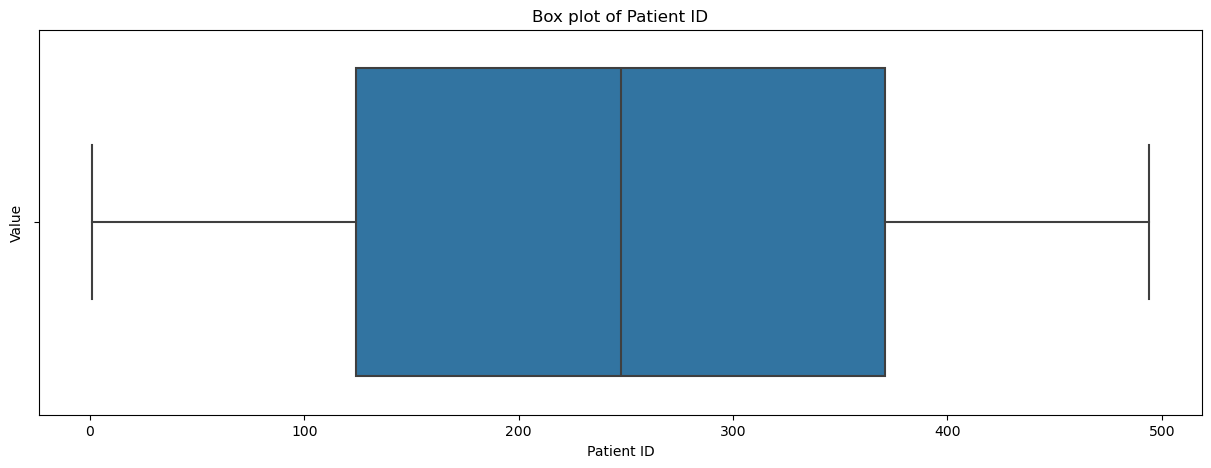

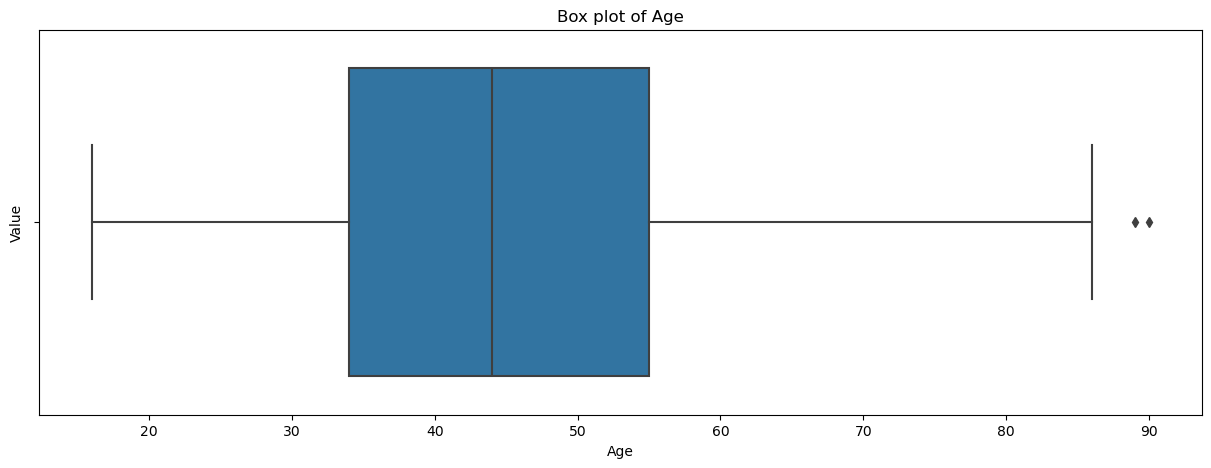

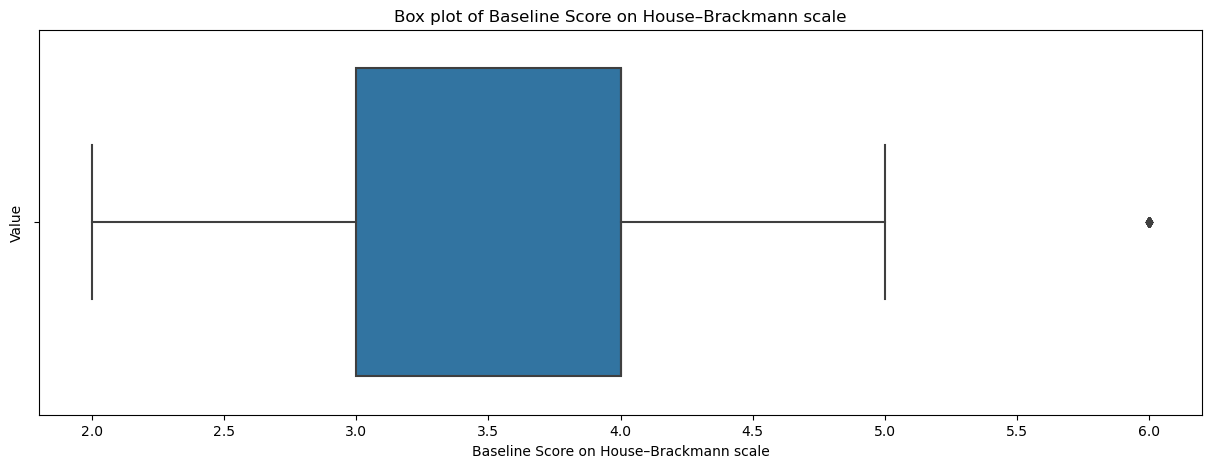

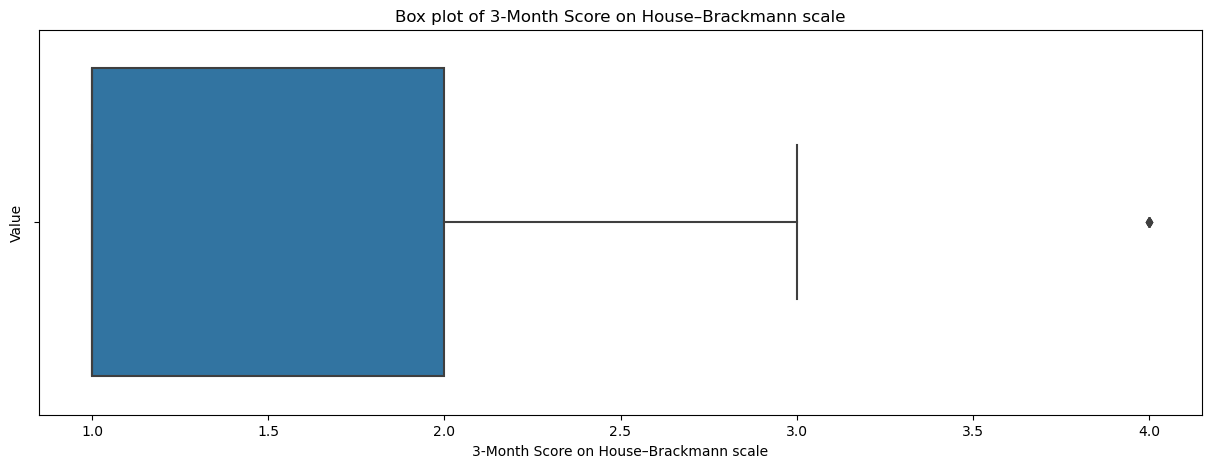

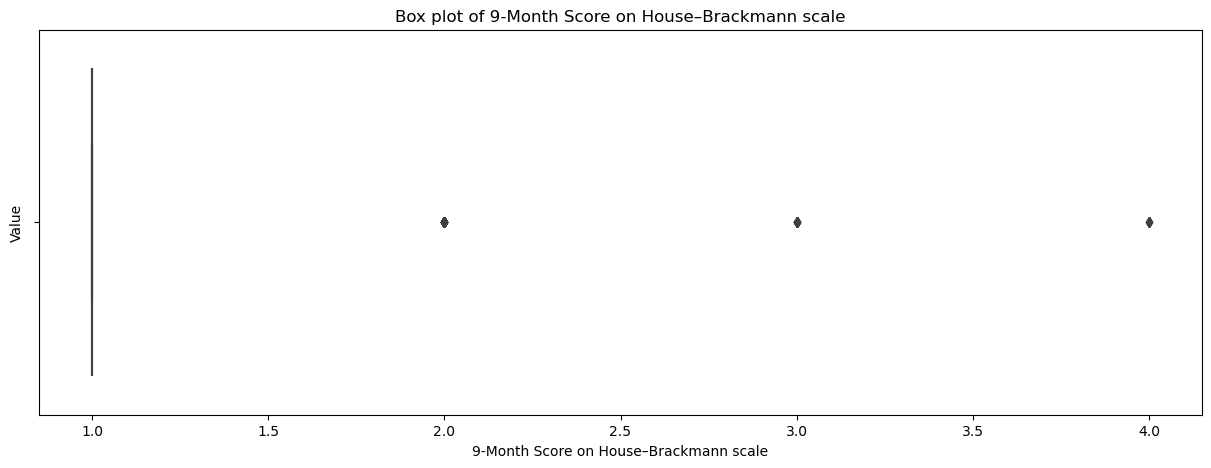

In [15]:
find_outliers_iqr_and_plot(data)

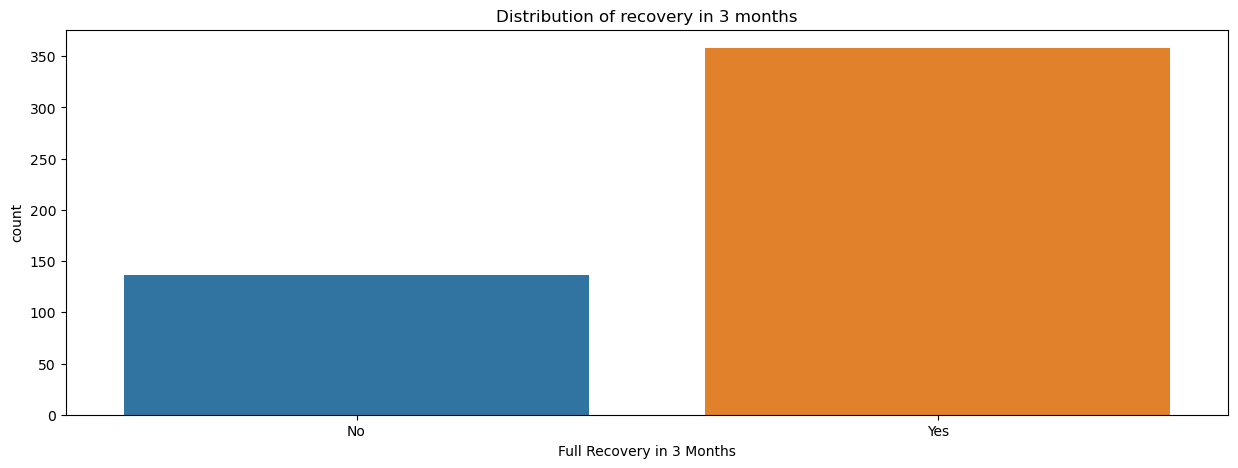

In [16]:
plt.figure(figsize=(15, 5))
plt.title('Distribution of recovery in 3 months')
sns.countplot(data = data, x = 'Full Recovery in 3 Months')
plt.show()

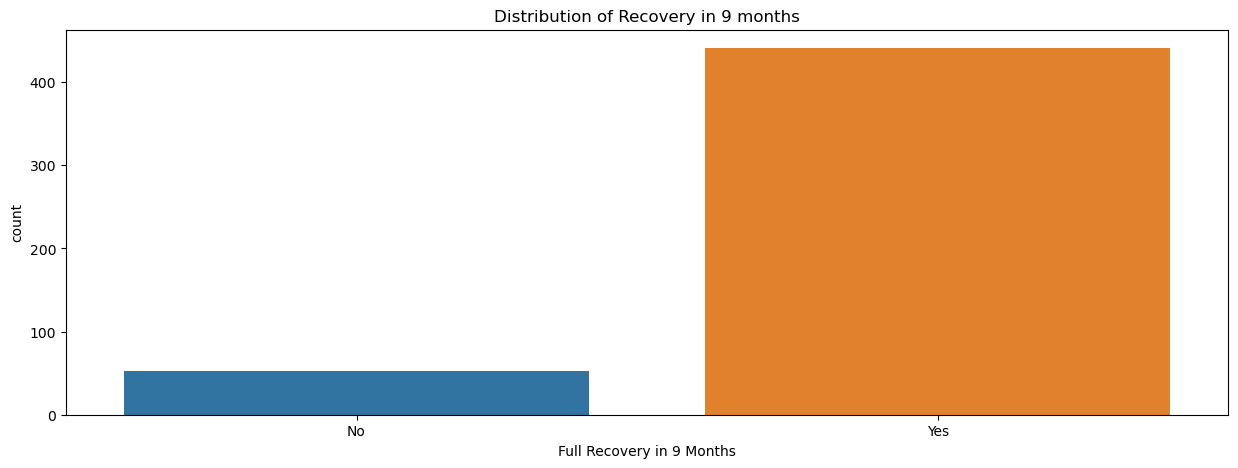

In [17]:
plt.figure(figsize=(15, 5))
plt.title('Distribution of Recovery in 9 months')
sns.countplot(data = data, x = 'Full Recovery in 9 Months')
plt.show()

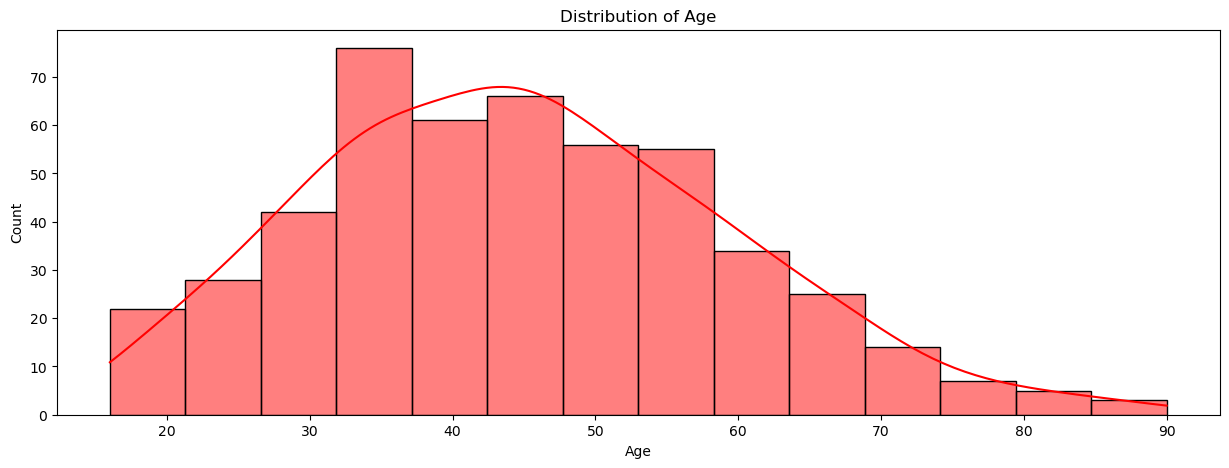

In [18]:
plt.figure(figsize=(15, 5))
plt.title('Distribution of Age')
sns.histplot(data = data, x = 'Age', kde = True, color = 'red')
plt.show()

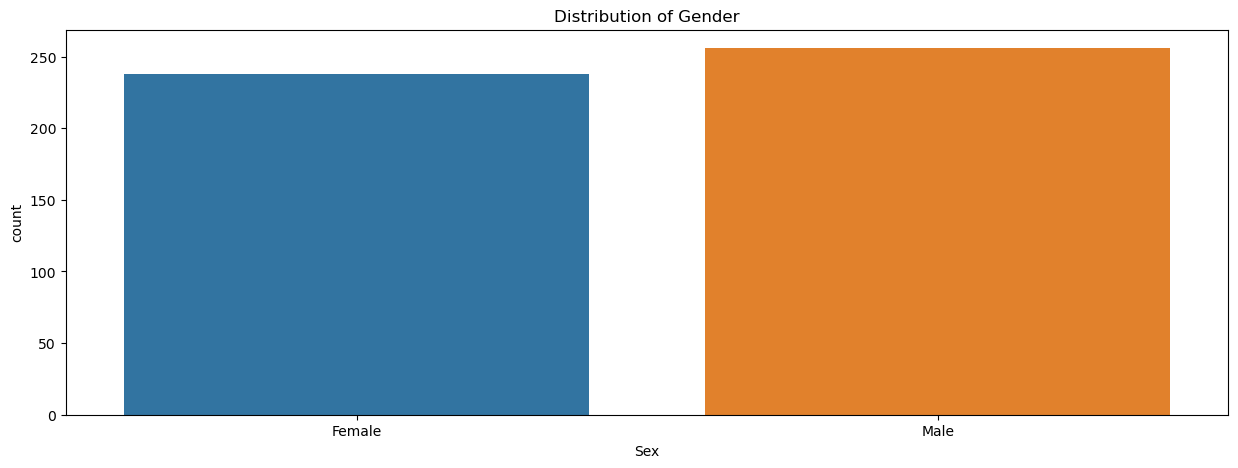

In [19]:
plt.figure(figsize=(15, 5))
plt.title('Distribution of Gender')
sns.countplot(data = data, x = 'Sex')
plt.show()

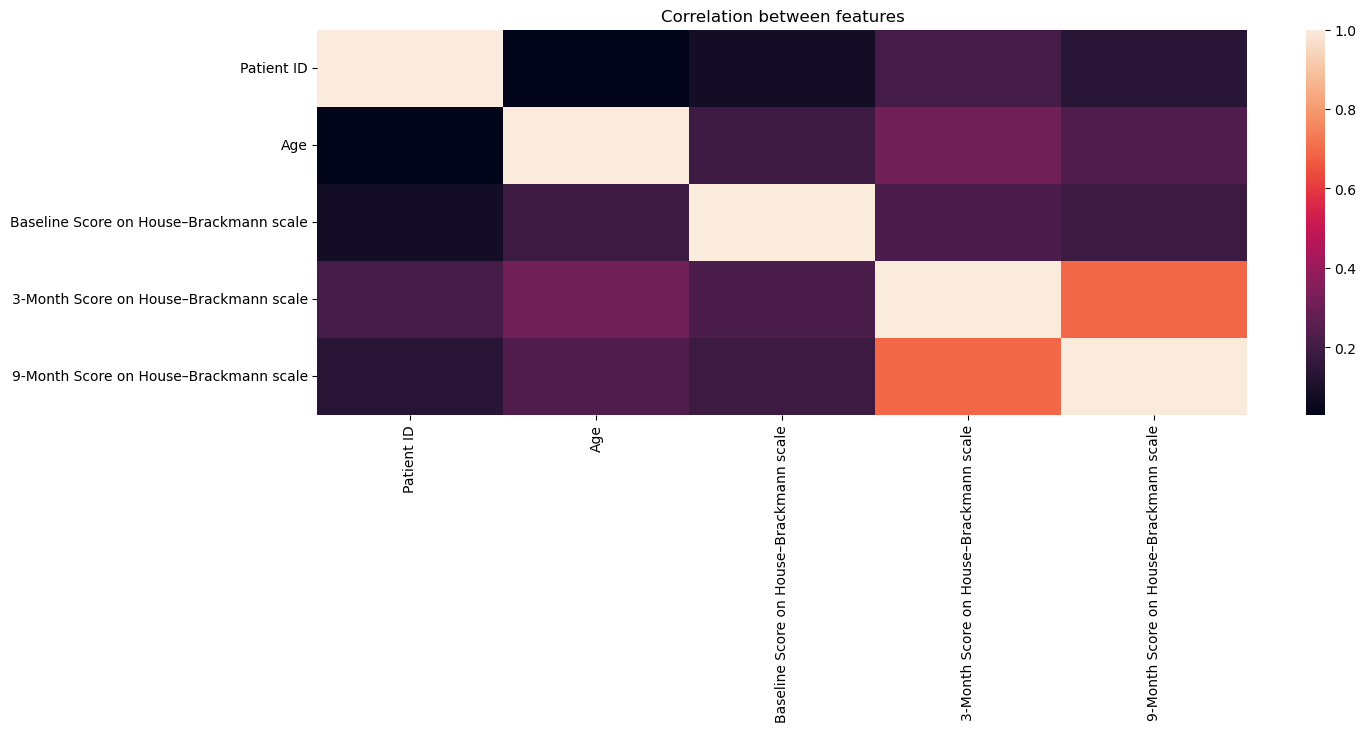

In [20]:
plt.figure(figsize = (15, 5))
plt.title('Correlation between features')
sns.heatmap(data.corr(numeric_only = True))
plt.show()

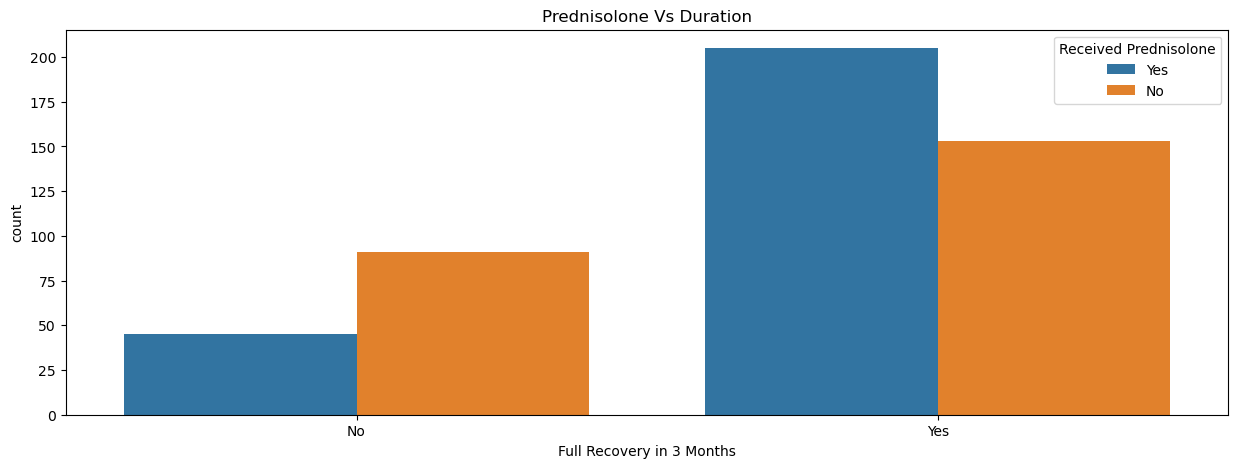

In [21]:
plt.figure(figsize=(15, 5))
plt.title('Prednisolone Vs Duration')
sns.countplot(data = data, x = 'Full Recovery in 3 Months', hue = 'Received Prednisolone')
plt.show()

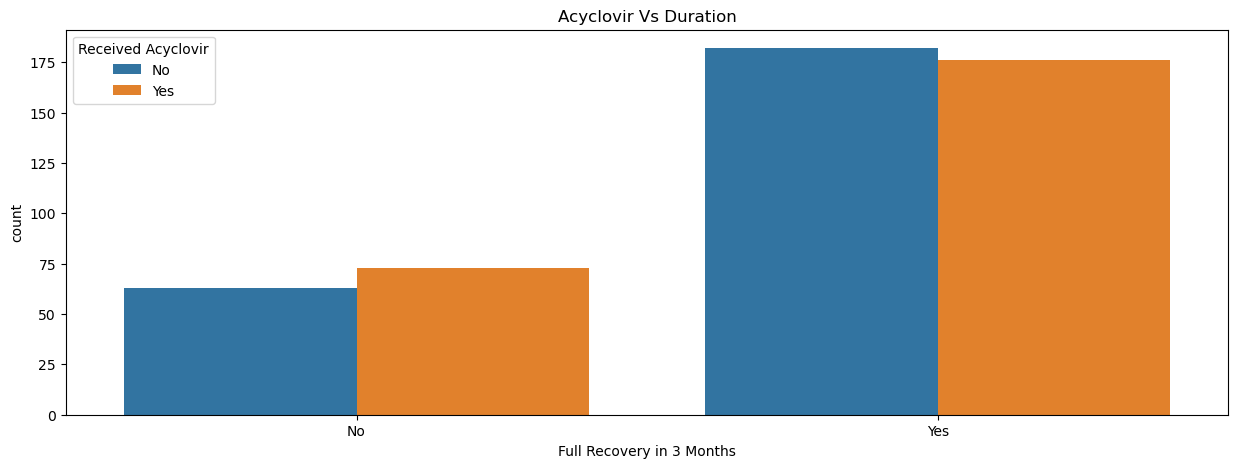

In [22]:
plt.figure(figsize=(15, 5))
plt.title('Acyclovir Vs Duration')
sns.countplot(data = data, x = 'Full Recovery in 3 Months', hue = 'Received Acyclovir')
plt.show()

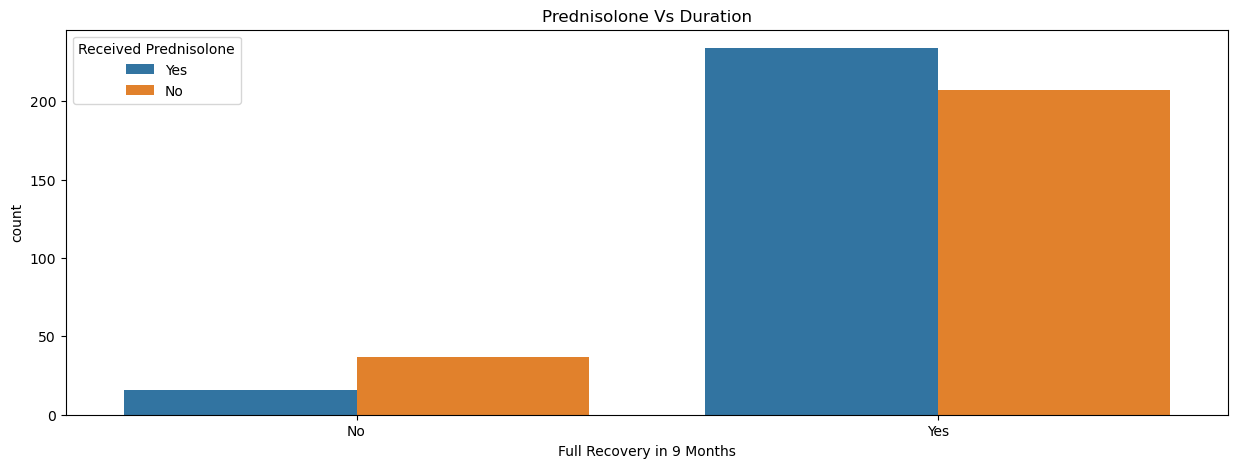

In [23]:
plt.figure(figsize=(15, 5))
plt.title('Prednisolone Vs Duration')
sns.countplot(data = data, x = 'Full Recovery in 9 Months', hue = 'Received Prednisolone')
plt.show()

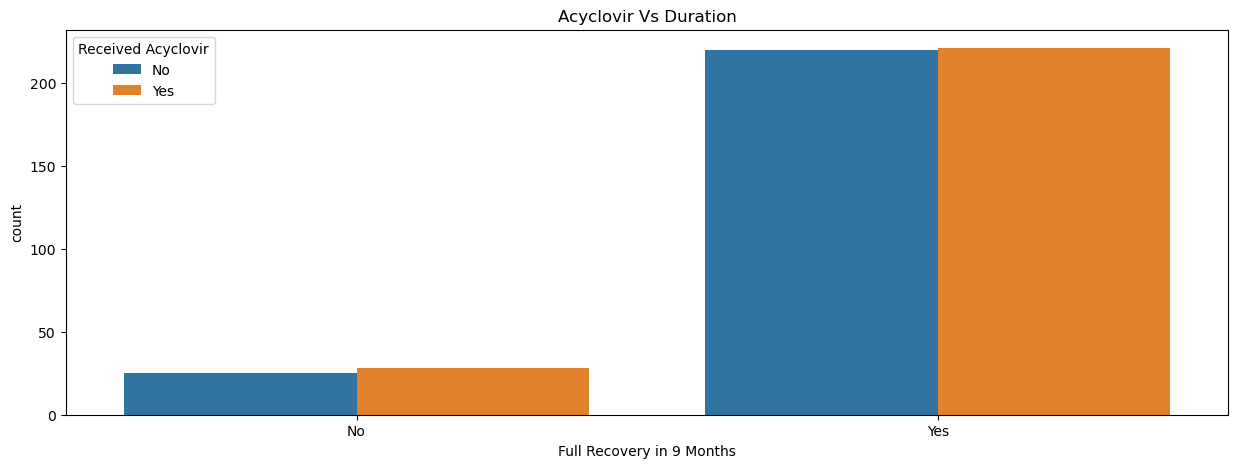

In [24]:
plt.figure(figsize=(15, 5))
plt.title('Acyclovir Vs Duration')
sns.countplot(data = data, x = 'Full Recovery in 9 Months', hue = 'Received Acyclovir')
plt.show()

In [25]:
data.head(2)

,Patient ID,Sex,Age,Baseline Score on House–Brackmann scale,Time between onset of symptoms and start of treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months
0,1,Female,77,6,Within 24 hr,Prednisolone–Placebo,Yes,No,2,No,2,No
1,2,Female,61,6,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes


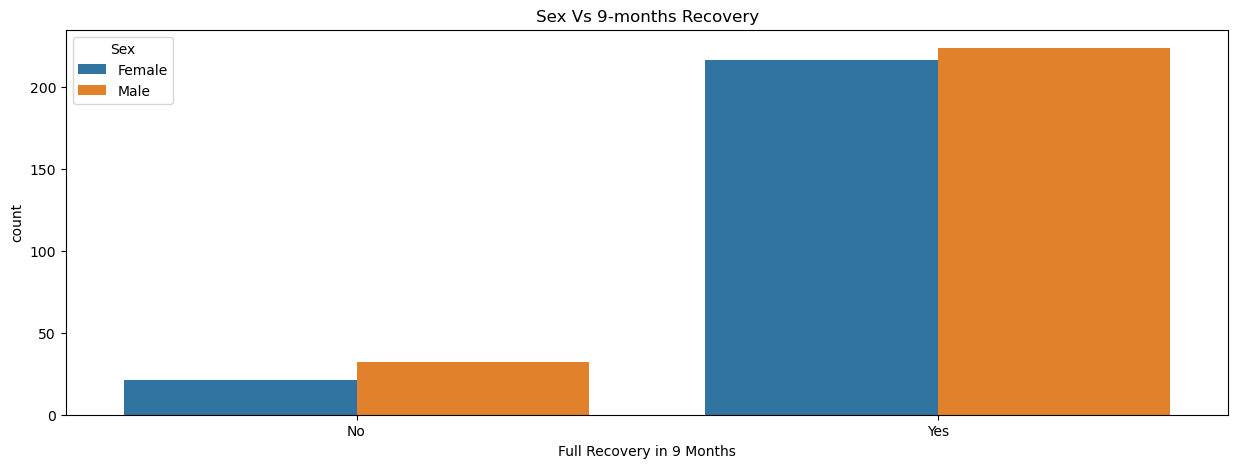

In [26]:
plt.figure(figsize=(15, 5))
plt.title('Sex Vs 9-months Recovery')
sns.countplot(data = data, x = 'Full Recovery in 9 Months', hue = 'Sex')
plt.show()

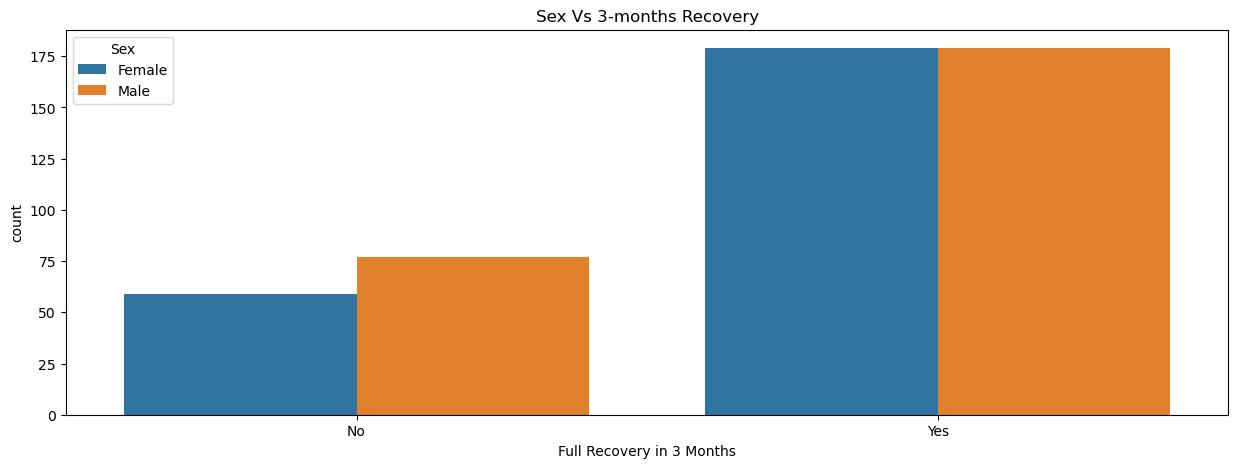

In [27]:
plt.figure(figsize=(15, 5))
plt.title('Sex Vs 3-months Recovery')
sns.countplot(data = data, x = 'Full Recovery in 3 Months', hue = 'Sex')
plt.show()

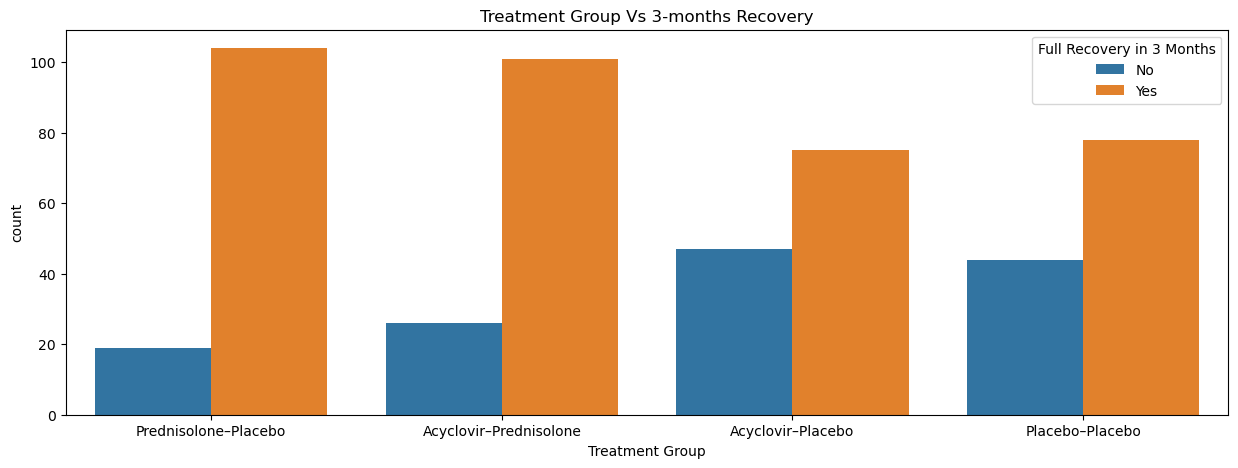

In [28]:
plt.figure(figsize=(15, 5))
plt.title('Treatment Group Vs 3-months Recovery')
sns.countplot(data = data, x = 'Treatment Group', hue = 'Full Recovery in 3 Months')
plt.show()

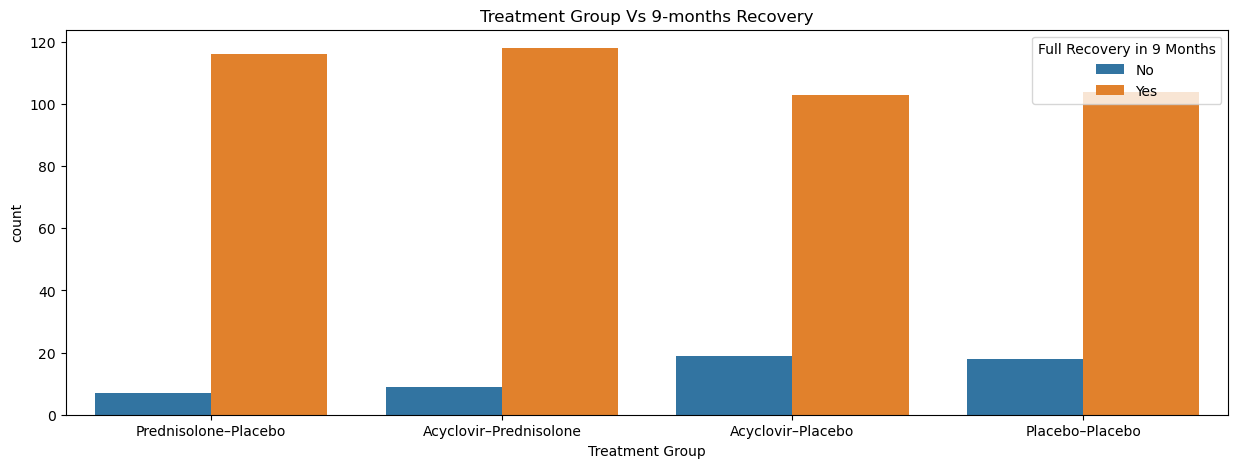

In [29]:
plt.figure(figsize=(15, 5))
plt.title('Treatment Group Vs 9-months Recovery')
sns.countplot(data = data, x = 'Treatment Group', hue = 'Full Recovery in 9 Months')
plt.show()

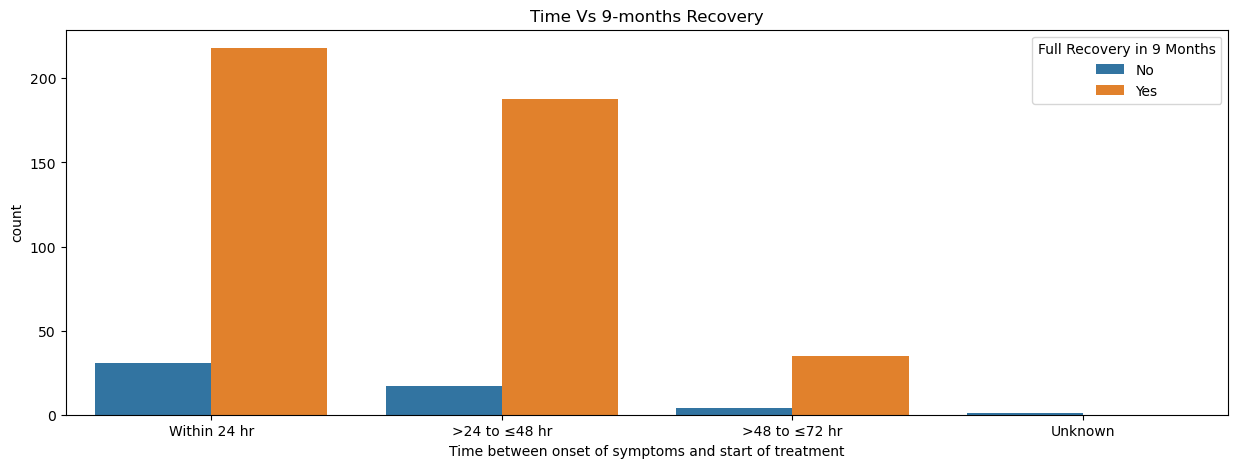

In [30]:
plt.figure(figsize=(15, 5))
plt.title('Time Vs 9-months Recovery')
sns.countplot(data = data, x = 'Time between onset of symptoms and start of treatment', hue = 'Full Recovery in 9 Months')
plt.show()

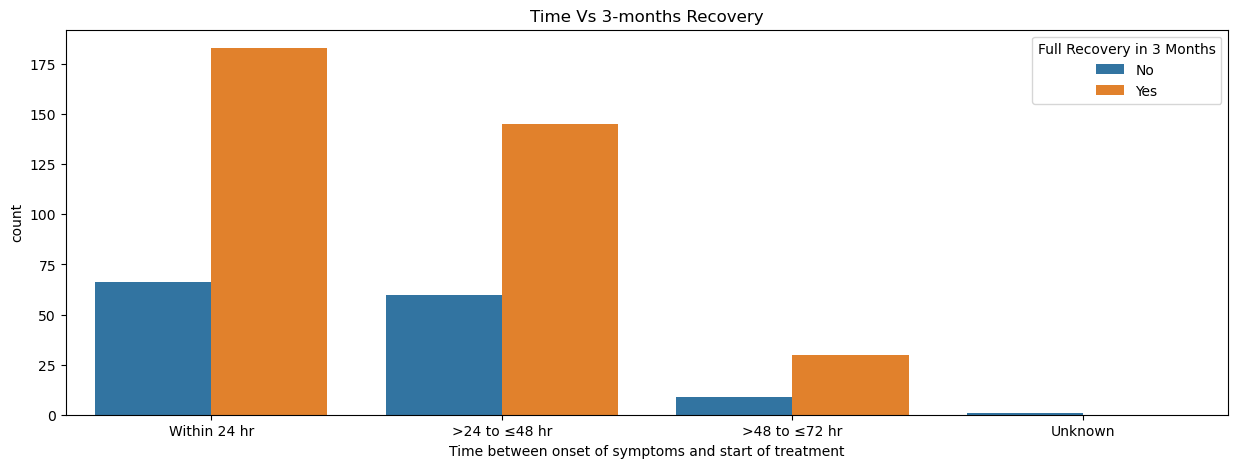

In [31]:
plt.figure(figsize=(15, 5))
plt.title('Time Vs 3-months Recovery')
sns.countplot(data = data, x = 'Time between onset of symptoms and start of treatment', hue = 'Full Recovery in 3 Months')
plt.show()

In [96]:
data.head()

,Patient ID,Sex,Age,Baseline Score on House–Brackmann scale,Time between onset of symptoms and start of treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months
0,1,Female,77,6,Within 24 hr,Prednisolone–Placebo,Yes,No,2,No,2,No
1,2,Female,61,6,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
2,3,Female,46,4,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
3,4,Female,46,3,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
4,5,Female,42,3,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes


In [146]:
a = data[['Full Recovery in 3 Months']]

In [148]:
b = data[['Full Recovery in 9 Months']]

In [167]:
c = pd.DataFrame(np.column_stack([a, b]))

In [179]:
c.head()

,0,1
0,No,No
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
